In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [32]:
train_data=pd.read_csv('https://raw.githubusercontent.com/ygtech27/Datasets/refs/heads/main/Titanic_train.csv')
test_data=pd.read_csv('https://raw.githubusercontent.com/ygtech27/Datasets/refs/heads/main/Titanic_test.csv')

Exploratory Data Analysis (EDA):

In [33]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


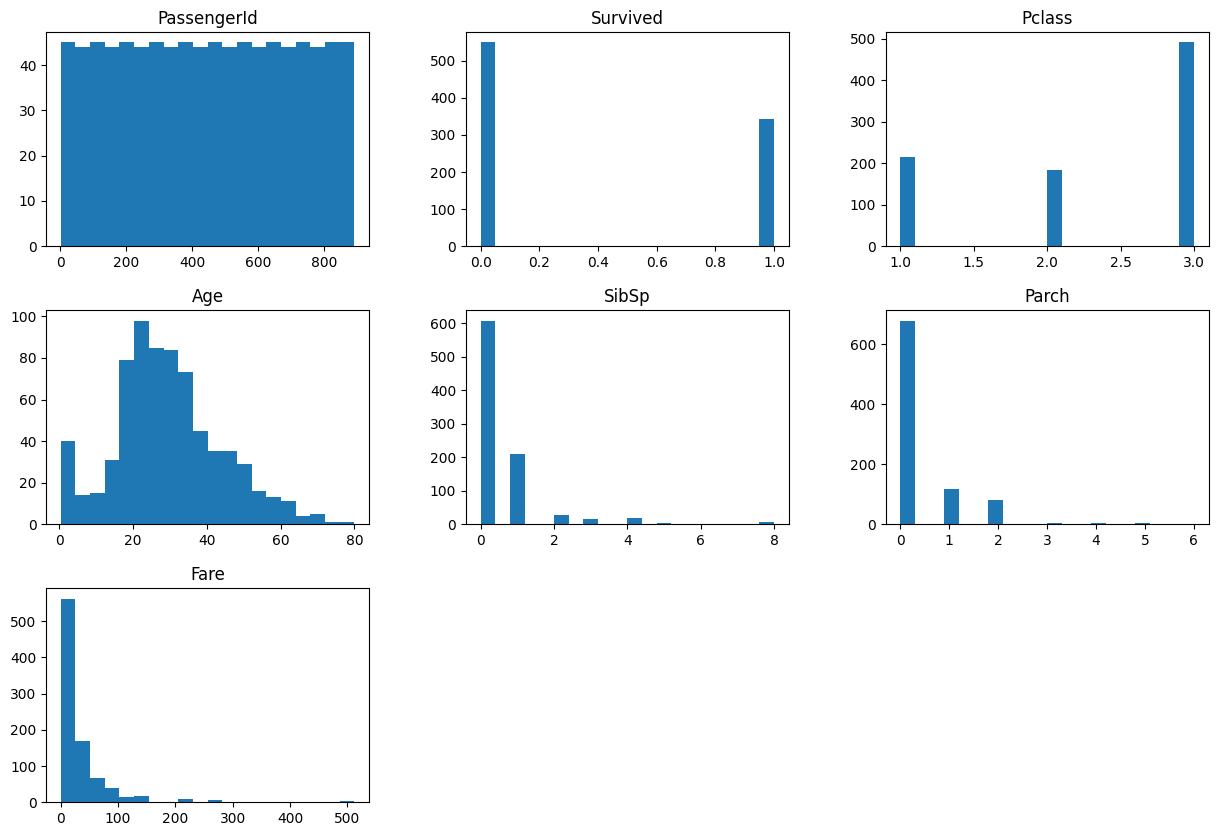

In [36]:
#Histogram
train_data.hist(bins=20,figsize=(15,10),grid=False)
plt.show()

<Axes: >

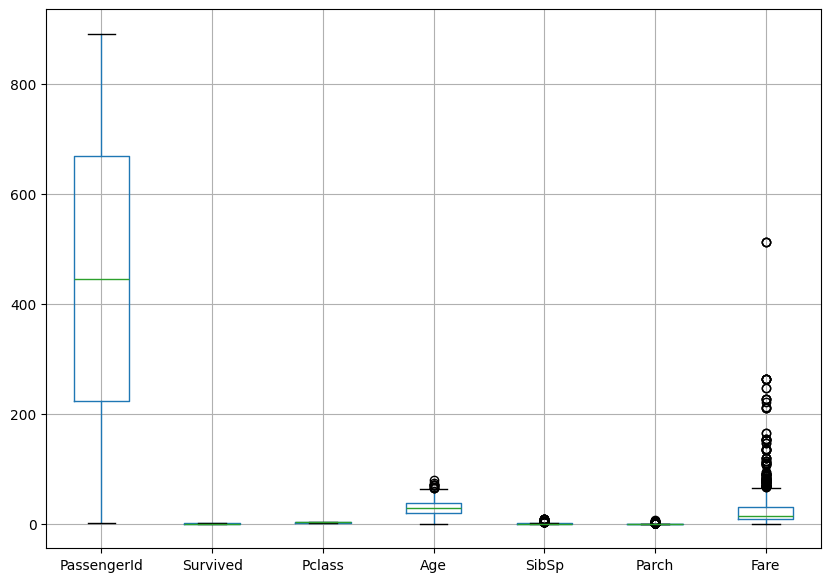

In [37]:
#Box Plot
plt.figure(figsize=(10,7))
train_data.boxplot()

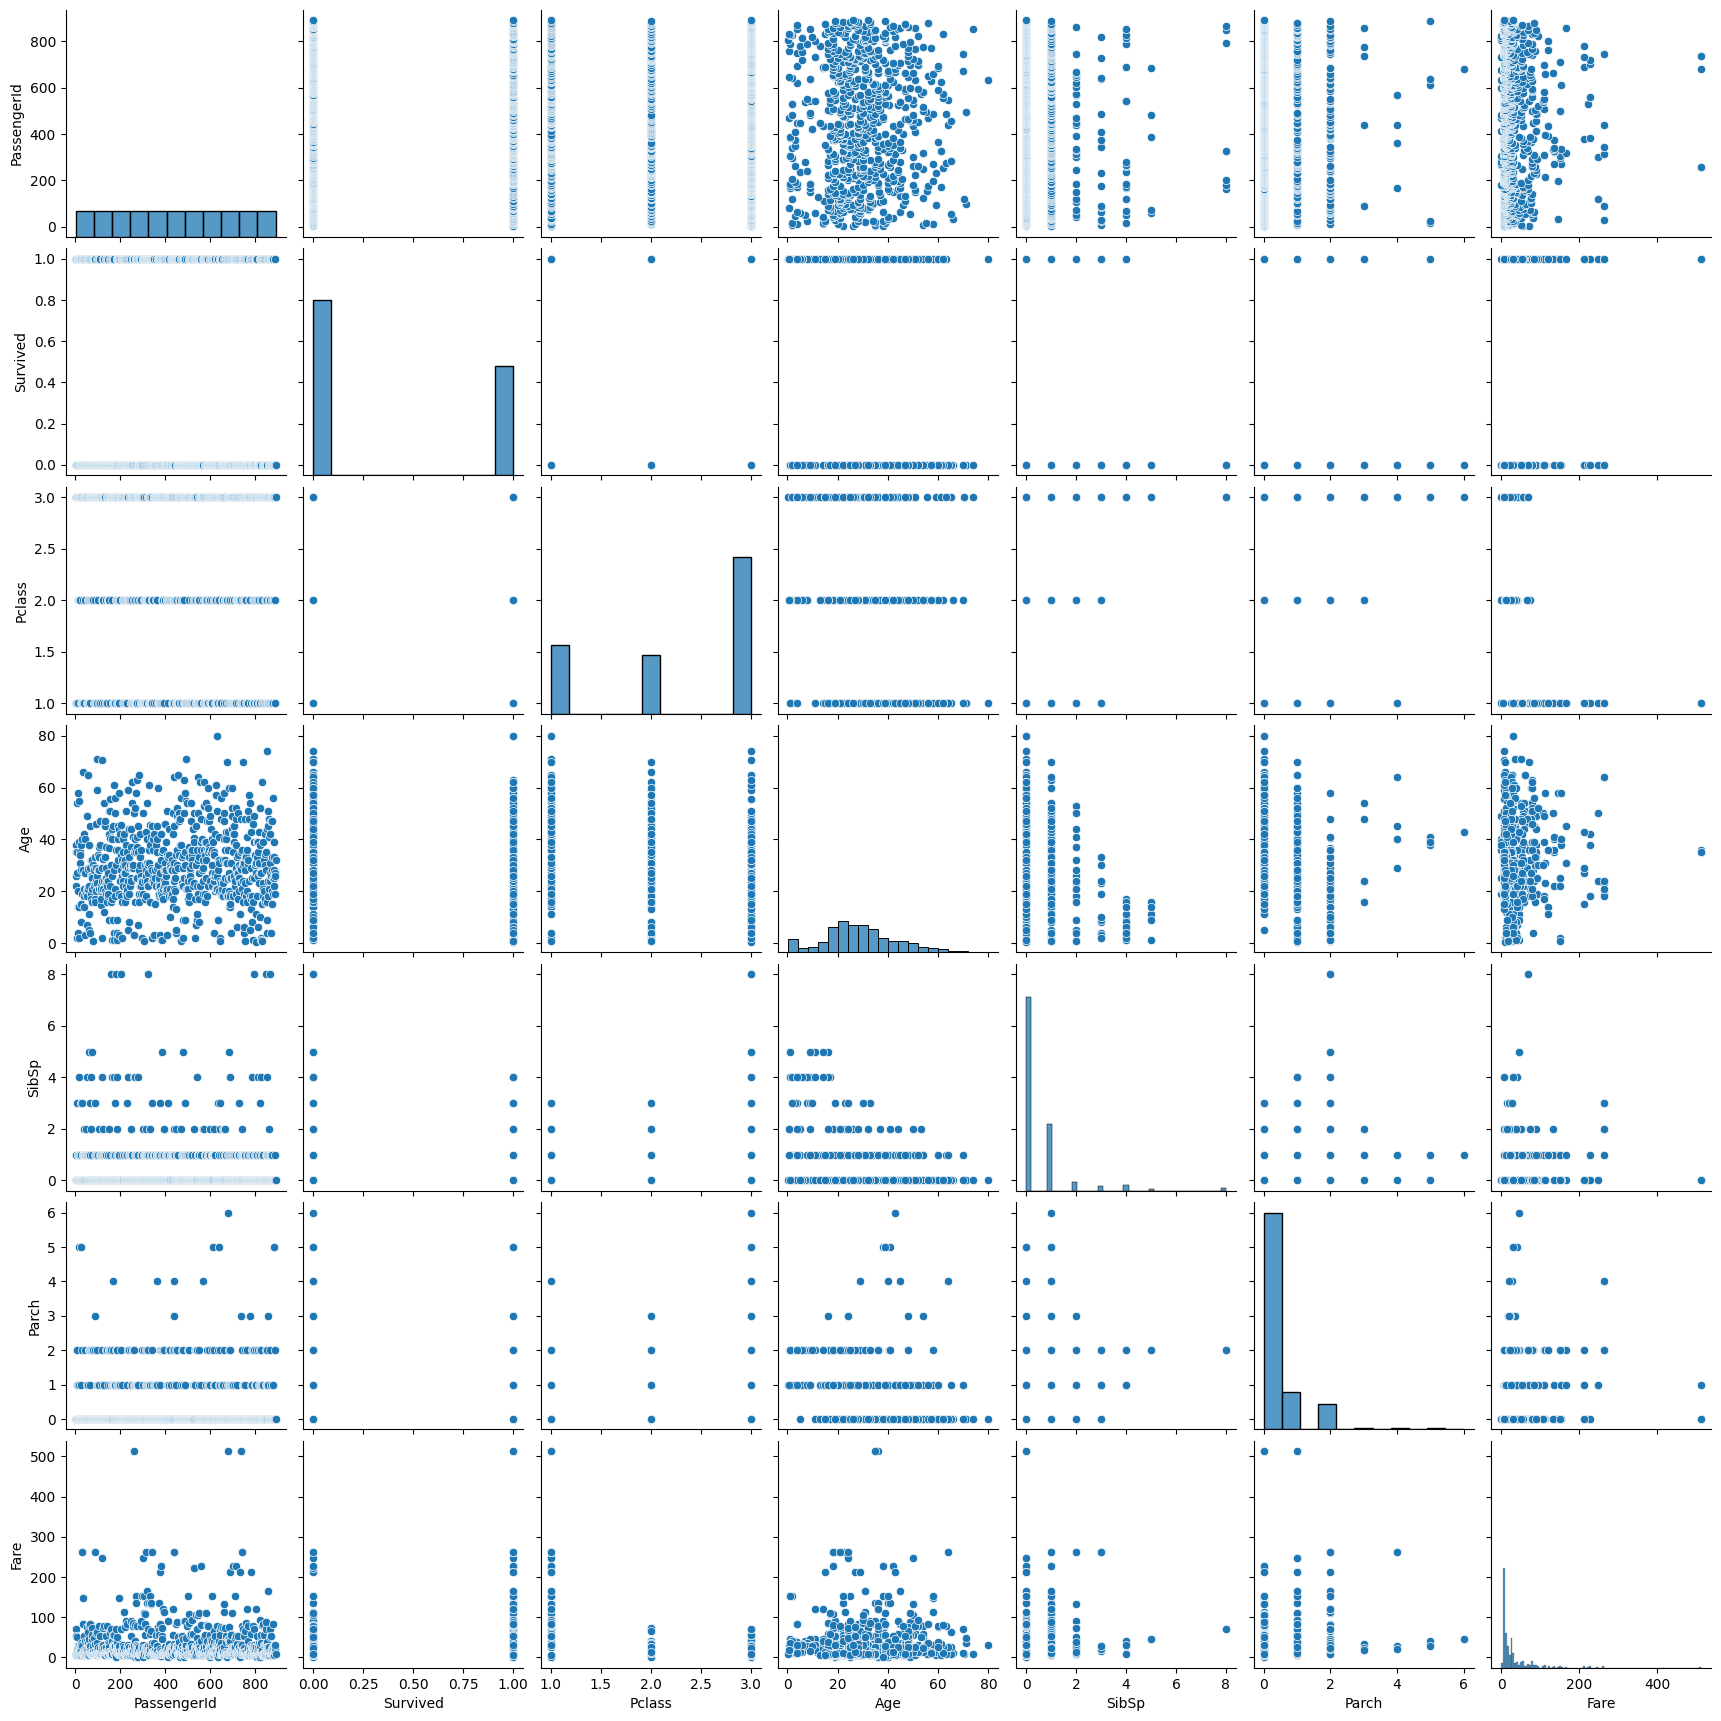

In [38]:
#Pair Plot
sns.pairplot(train_data)


Data Preprocessing:

In [39]:
#imputing the missing values
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode())
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())
test_data['Embarked']=test_data['Embarked'].fillna(test_data['Embarked'].mode())


In [40]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [42]:
train_data.drop(['Name','Ticket'],axis=1,inplace=True)
test_data.drop(['Name','Ticket'],axis=1,inplace=True)


KeyError: "['Name', 'Ticket'] not found in axis"

In [43]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,NaN,S
1,2,1,1,female,38.000000,1,0,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,7.9250,NaN,S
3,4,1,1,female,35.000000,1,0,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,NaN,S
887,888,1,1,female,19.000000,0,0,30.0000,B42,S
888,889,0,3,female,29.699118,1,2,23.4500,NaN,S
889,890,1,1,male,26.000000,0,0,30.0000,C148,C


In [44]:
dum=pd.get_dummies(train_data[['Sex','Embarked']])
dumm=pd.get_dummies(test_data[['Sex','Embarked']])

In [45]:
train_data.drop(['Sex','Embarked'],axis=1,inplace=True)
test_data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [46]:
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.000000,1,0,7.2500,NaN
1,2,1,1,38.000000,1,0,71.2833,C85
2,3,1,3,26.000000,0,0,7.9250,NaN
3,4,1,1,35.000000,1,0,53.1000,C123
4,5,0,3,35.000000,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,NaN
887,888,1,1,19.000000,0,0,30.0000,B42
888,889,0,3,29.699118,1,2,23.4500,NaN
889,890,1,1,26.000000,0,0,30.0000,C148


In [47]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin
0,892,3,34.50000,0,0,7.8292,NaN
1,893,3,47.00000,1,0,7.0000,NaN
2,894,2,62.00000,0,0,9.6875,NaN
3,895,3,27.00000,0,0,8.6625,NaN
4,896,3,22.00000,1,1,12.2875,NaN
...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,NaN
414,1306,1,39.00000,0,0,108.9000,C105
415,1307,3,38.50000,0,0,7.2500,NaN
416,1308,3,30.27259,0,0,8.0500,NaN


In [48]:
df=train_data.join(dum,how='left')
df1=test_data.join(dumm,how='left')
df
df1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,NaN,False,True,False,True,False
1,893,3,47.00000,1,0,7.0000,NaN,True,False,False,False,True
2,894,2,62.00000,0,0,9.6875,NaN,False,True,False,True,False
3,895,3,27.00000,0,0,8.6625,NaN,False,True,False,False,True
4,896,3,22.00000,1,1,12.2875,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,NaN,False,True,False,False,True
414,1306,1,39.00000,0,0,108.9000,C105,True,False,True,False,False
415,1307,3,38.50000,0,0,7.2500,NaN,False,True,False,False,True
416,1308,3,30.27259,0,0,8.0500,NaN,False,True,False,False,True


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
features=df.drop(['Survived'],axis=1)

In [51]:
target=df['Survived']

In [52]:
features
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [55]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

Building Predictive Models:



LGBM (LightGB Model)

In [57]:
# Convert 'Cabin' column to numerical representation using one-hot encoding
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'Cabin' column
df = pd.get_dummies(df, columns=['Cabin'], prefix=['Cabin'], drop_first=True)

# Now, proceed with your train-test split and model fitting
from sklearn.model_selection import train_test_split
import lightgbm as lgb

features = df.drop(['Survived'], axis=1)
target = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier()

In [58]:
y_pred=model.predict(x_test)

In [59]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [60]:
accuracy_score(y_test,y_pred)

0.8171641791044776

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



XGBoost

In [62]:
from xgboost import XGBClassifier

In [63]:
model2=XGBClassifier()

In [64]:
model2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
y_preds=model2.predict(x_test)

In [66]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
params = {'learning_rate':[0.2,0.3,0.4,0.5], 'max_depth':[2,3,4,5], 'min_child_weight':[2,3,4,5],'n_estimators':[80,60,70,90]}

In [69]:
warnings.simplefilter('ignore')
grid = GridSearchCV(lgb.LGBMClassifier(),params,scoring='accuracy')
grid.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [2, 3, 4, 5],
                         'n_estimators': [80, 60, 70, 90]},
             scoring='accuracy')

In [70]:
import xgboost as xgb

In [71]:
param={
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100]
}
grid_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param, cv=3, scoring='accuracy')
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [72]:
print(grid_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


Comparative Analysis:

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [74]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [75]:
lgb_accuracy=accuracy_score(y_test,y_pred)*100
lgb_precision=precision_score(y_test,y_pred)*100
lgb_recall=recall_score(y_test,y_pred)*100
lgb_f1score=f1_score(y_test,y_pred)*100

In [76]:
xgb_accuracy=accuracy_score(y_test,y_preds)*100
xgb_precision=precision_score(y_test,y_preds)*100
xgb_recall=recall_score(y_test,y_preds)*100
xgb_f1score=f1_score(y_test,y_preds)*100

In [77]:
metrics={
    'Metrics':['Accuracy','Precision','Recall','F1'],
    'LGBoost':[lgb_accuracy,lgb_precision,lgb_recall,lgb_f1score],
    'XGBoost':[xgb_accuracy,xgb_precision,xgb_recall,xgb_f1score]
}

In [78]:
metrics_df=pd.DataFrame(metrics)
metrics_df

,Metrics,LGBoost,XGBoost
0,Accuracy,81.716418,80.223881
1,Precision,81.000000,79.000000
2,Recall,72.972973,71.171171
3,F1,76.777251,74.881517


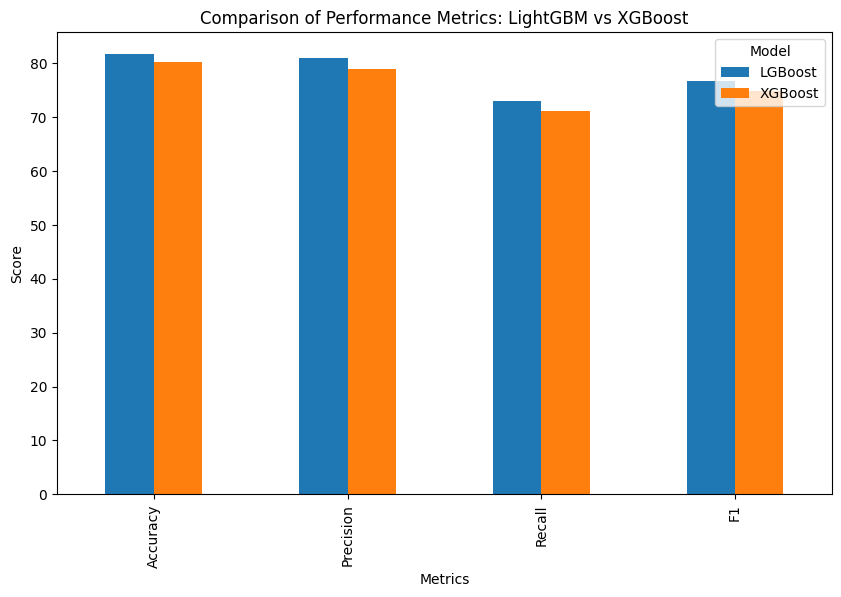

In [79]:
#Visualizations between LightGBM and XGBoost
metrics_df.plot(x='Metrics', kind='bar', figsize=(10, 6))
plt.title("Comparison of Performance Metrics: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.legend(title="Model")
plt.show()